# QQQ Analyst Price Target EDA and Analysis

In [1]:
#Load em up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from scipy.stats import norm
import os

In [2]:
df = pd.read_excel('all_data.xlsx')
df.head(3)

,Unnamed: 0,Date,AAPL High,AAPL Price Target,MSFT High,MSFT Price Target,AMZN High,AMZN Price Target,TSLA High,TSLA Price Target,...,SWKS High,SWKS Price Target,SPLK High,SPLK Price Target,NTES High,NTES Price Target,OKTA High,OKTA Price Target,DOCU High,DOCU Price Target
0,0,07-20-2012,18.762759,26.68112,25.351955,35.44469,11.4695,12.95806,6.450,7.66154,...,25.786051,NaN,29.57,NaN,9.414983,NaN,NaN,NaN,NaN,NaN
1,1,07-23-2012,18.501978,26.68112,24.151717,35.40091,11.3290,12.93387,6.260,7.66154,...,24.905465,NaN,28.63,NaN,9.226242,NaN,NaN,NaN,NaN,NaN
2,2,07-24-2012,18.617406,26.39822,23.972090,35.40091,11.3305,12.95806,6.208,7.65714,...,24.887675,NaN,28.25,NaN,9.316362,NaN,NaN,NaN,NaN,NaN


In [3]:
list(df.columns)

['Unnamed: 0',
 ' Date',
 'AAPL High',
 'AAPL Price Target',
 'MSFT High',
 'MSFT Price Target',
 'AMZN High',
 'AMZN Price Target',
 'TSLA High',
 'TSLA Price Target',
 'GOOG High',
 'GOOG Price Target',
 'META High',
 'META Price Target',
 'NVDA High',
 'NVDA Price Target',
 'PEP High',
 'PEP Price Target',
 'COST High',
 'COST Price Target',
 'AVGO High',
 'AVGO Price Target',
 'ADBE High',
 'ADBE Price Target',
 'CMCSA High',
 'CMCSA Price Target',
 'CSCO High',
 'CSCO Price Target',
 'TMUS High',
 'TMUS Price Target',
 'QCOM High',
 'QCOM Price Target',
 'INTC High',
 'INTC Price Target',
 'TXN High',
 'TXN Price Target',
 'AMD High',
 'AMD Price Target',
 'AMGN High',
 'AMGN Price Target',
 'HON High',
 'HON Price Target',
 'INTU High',
 'INTU Price Target',
 'NFLX High',
 'NFLX Price Target',
 'SBUX High',
 'SBUX Price Target',
 'PYPL High',
 'PYPL Price Target',
 'ADP High',
 'ADP Price Target',
 'AMAT High',
 'AMAT Price Target',
 'MDLZ High',
 'MDLZ Price Target',
 'ADI High'

In [4]:
# get list of stocks
cols = df.columns
cols = pd.DataFrame(cols)
cols

,0
0,Unnamed: 0
1,Date
2,AAPL High
3,AAPL Price Target
4,MSFT High
...,...
196,NTES Price Target
197,OKTA High
198,OKTA Price Target
199,DOCU High


In [5]:
cols['stonks'] = cols[0].str.split(' ').str[0]
cols

,0,stonks
0,Unnamed: 0,Unnamed:
1,Date,
2,AAPL High,AAPL
3,AAPL Price Target,AAPL
4,MSFT High,MSFT
...,...,...
196,NTES Price Target,NTES
197,OKTA High,OKTA
198,OKTA Price Target,OKTA
199,DOCU High,DOCU


In [6]:
stocks = cols['stonks'].unique()
stocks = stocks[2:]
stocks

array(['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOG', 'META', 'NVDA', 'PEP',
       'COST', 'AVGO', 'ADBE', 'CMCSA', 'CSCO', 'TMUS', 'QCOM', 'INTC',
       'TXN', 'AMD', 'AMGN', 'HON', 'INTU', 'NFLX', 'SBUX', 'PYPL', 'ADP',
       'AMAT', 'MDLZ', 'ADI', 'CHTR', 'ISRG', 'GILD', 'BKNG', 'VRTX',
       'MU', 'MRNA', 'CSX', 'LRCX', 'REGN', 'FISV', 'ATVI', 'KLA', 'KDP',
       'MNST', 'SNPS', 'PANW', 'MAR', 'FTNT', 'AEP', 'KHC', 'NXPI',
       'MRVL', 'ORLY', 'CDNS', 'ASML', 'PAYX', 'ADSK', 'EXC', 'ABNB',
       'CTAS', 'CRWD', 'MELI', 'DLTR', 'AZN', 'LULU', 'XCEL', 'MCHP',
       'EA', 'CTSH', 'LCID', 'WBA', 'DXCM', 'IDXX', 'SGEN', 'JD', 'ILMN',
       'ODFL', 'TEAM', 'BIDU', 'BIIB', 'PCAR', 'WDAY', 'CPRT', 'ROST',
       'VRSK', 'DDOG', 'FAST', 'ZOOM', 'EBAY', 'SIRI', 'PDD', 'ZS',
       'ANSS', 'ALGN', 'MTCH', 'VRSN', 'CEG', 'SWKS', 'SPLK', 'NTES',
       'OKTA', 'DOCU'], dtype=object)

In [7]:
# filter down to times when the stock High is above the Price Target
stocks = pd.DataFrame(stocks)
#stocks.to_excel('stock_list.xlsx')

In [8]:
stocks = stocks[0].to_list()

In [9]:
# delete KLA from list
stocks.remove('KLA')

In [10]:
stocks.remove('XCEL')

In [11]:
stocks.remove('ZOOM')

In [30]:
time_over_avgPriceTarget = []
returns = []

for stock in stocks:
    stock_cols = [col for col in df.columns if stock in col]
    stock_df = df[stock_cols]
    stock_outperform = stock_df[stock_df[stock + ' Price Target'] < stock_df[stock +' High']]
    stock_df['outperform']= np.where(stock_df[stock + ' Price Target'] < stock_df[stock + ' High'], 1, 0)
    stock_df['one_month_returns'] =  stock_df[stock + ' High'].shift(-24) / stock_df[stock + ' High'] -1
    stock_df['one_week_returns'] = stock_df[stock + ' High'].shift(-7) / stock_df[stock + ' High'] -1
    stock_df['one_day_returns'] = stock_df[stock + ' High'].shift(-1) / stock_df[stock + ' High'] -1
    stock_df.to_excel('ind_stocks/' + stock + '.xlsx')
    
    #time over average
    time_over_average =round(len(stock_outperform) / 2517,2)
    tot = (stock, time_over_average)
    time_over_avgPriceTarget.append(tot)

    #  get returns
    stock_df2 = stock_df.loc[stock_df['outperform'] == 1]
    day_return = stock_df2['one_day_returns'].mean()
    week_return = stock_df2['one_week_returns'].mean()
    month_return = stock_df2['one_month_returns'].mean()
    num_days = len(stock_df2)
    tot = (stock, day_return, week_return, month_return, num_days)
    returns.append(tot)


time_over_avgPriceTarget = pd.DataFrame(time_over_avgPriceTarget)
time_over_avgPriceTarget.columns = ['Stock', 'Time Over Average Price Target']
time_over_avgPriceTarget

returns = pd.DataFrame(returns)
returns.columns = ['Stock', 'Day Return', 'Week Return', 'Month Return', 'Number of Days']
returns


C:\Users\tmcro\AppData\Local\Temp/ipykernel_44664/2956647286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['outperform']= np.where(stock_df[stock + ' Price Target'] < stock_df[stock + ' High'], 1, 0)
C:\Users\tmcro\AppData\Local\Temp/ipykernel_44664/2956647286.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['one_month_returns'] =  stock_df[stock + ' High'].shift(-24) / stock_df[stock + ' High'] -1
C:\Users\tmcro\AppData\Local\Temp/ipykernel_44664/2956647286.py:10: SettingWithCopy

,Stock,Day Return,Week Return,Month Return,Number of Days
0,AAPL,0.002843,0.019280,0.060681,217
1,MSFT,-0.008693,-0.028851,-0.024068,4
2,AMZN,0.007742,0.032279,0.059580,37
3,TSLA,0.003692,0.023900,0.083334,1285
4,GOOG,0.004325,0.016347,0.029086,16
...,...,...,...,...,...
93,SWKS,-0.005708,-0.006595,-0.025372,34
94,SPLK,0.001011,0.011289,-0.032804,26
95,NTES,0.000545,-0.019472,-0.067790,21
96,OKTA,-0.003421,-0.034708,-0.083001,64


In [31]:
returns.describe()

,Day Return,Week Return,Month Return,Number of Days
count,91.000000,91.000000,91.000000,98.000000
mean,-0.001020,-0.003228,0.002227,98.459184
std,0.017069,0.035703,0.060849,159.852456
min,-0.149877,-0.240786,-0.261113,0.000000
25%,-0.001875,-0.011329,-0.028144,16.500000
50%,0.000817,-0.000084,0.002473,47.500000
75%,0.002805,0.009173,0.029954,116.000000
max,0.042108,0.081620,0.173267,1285.000000


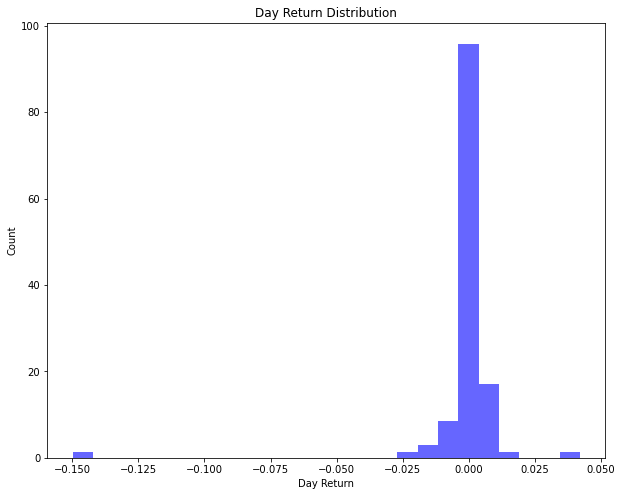

In [36]:
from matplotlib.pyplot import subplots

data = returns['Day Return']
# Plot the histogram.
fix, ax = subplots(figsize=(10, 8))
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF.
plt.ylabel('Count')
plt.xlabel('Day Return')
plt.title('Day Return Distribution')

plt.show()

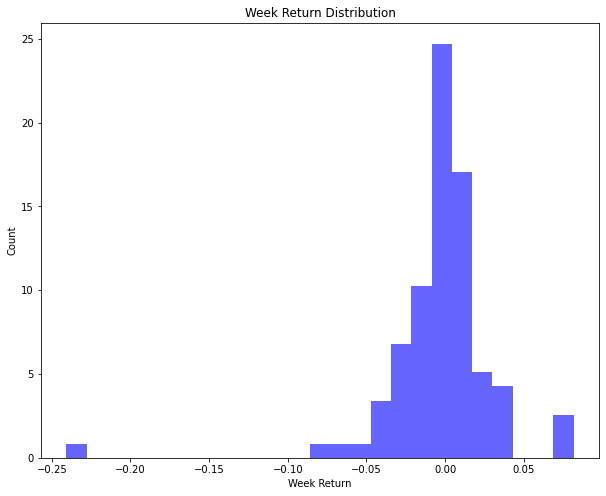

In [37]:
data = returns['Week Return']
# Plot the histogram.
fix, ax = subplots(figsize=(10, 8))
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF.
plt.ylabel('Count')
plt.xlabel('Week Return')
plt.title('Week Return Distribution')

plt.show()

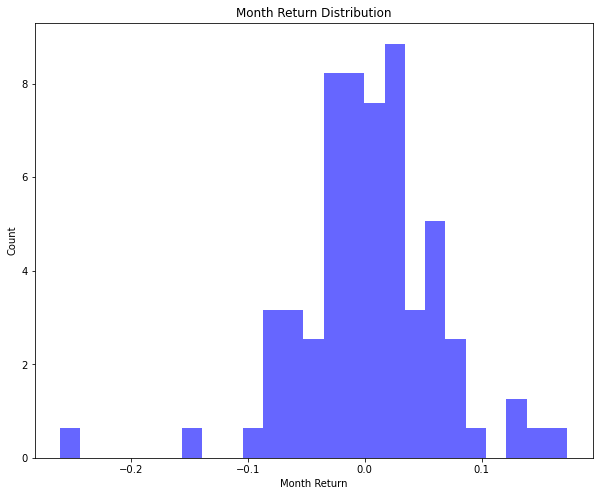

In [38]:
# Month Return
data = returns['Month Return']
# Plot the histogram.
fix, ax = subplots(figsize=(10, 8))
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF.
plt.ylabel('Count')
plt.xlabel('Month Return')
plt.title('Month Return Distribution')
plt.show()

In [25]:
df1 = pd.read_excel('ind_stocks/AAPL.xlsx')

In [26]:
df1 = df1.loc[df1['outperform'] == 1]

In [27]:
df1

,Unnamed: 0,AAPL High,AAPL Price Target,outperform,one_month_returns,one_week_returns,one_day_returns
1537,1537,53.903191,53.78030,1,0.044655,-0.007338,0.021343
1538,1538,55.053660,54.13636,1,0.017918,-0.017353,0.002672
1539,1539,55.200785,54.28788,1,-0.002010,-0.016909,0.001354
1540,1540,55.275553,54.62879,1,-0.019112,-0.003622,0.002138
1541,1541,55.393735,54.58824,1,-0.010450,-0.012322,-0.010101
...,...,...,...,...,...,...,...
2378,2378,178.739329,173.89976,1,-0.027385,-0.022597,0.020365
2379,2379,182.379336,173.89976,1,-0.047641,-0.031168,0.000328
2380,2380,182.439172,175.14024,1,-0.040268,-0.034547,-0.015142
2381,2381,179.676755,175.14024,1,-0.018288,-0.035467,-0.027030


In [ ]:
# Calculate average one month returns, one week returns, and one day returns
df1['one_month_returns'] = df1['AAPL High'].shift(-24) / df1['AAPL High'] -1

0.06068118443094793

In [ ]:
data = time_over_avgPriceTarget['Time Over Average Price Target']
mu, std = norm.fit(data) 
# Plot the histogram.
plt.hist(time_over_avgPriceTarget['Time Over Average Price Target'], bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) 
plt.plot(x, p, 'k', linewidth=2)
plt.title('Time Over Average Price Target Histogram') 
plt.show()

Here, we have two stocks that do not fit in the distribution. Let's check on them.

In [ ]:
time_over_avgPriceTarget = time_over_avgPriceTarget.sort_values(by='Time Over Average Price Target', ascending=False)
time_over_avgPriceTarget.head(2)

These two stocks are Tesla and NVDA. Tesla, impressively, has spent over 50 percent of its time above the average analyst price target. I will delete these two from the data, as they are outliers. 

In [ ]:
time_over_avgPriceTarget = time_over_avgPriceTarget[2:]
time_over_avgPriceTarget

In [ ]:
time_over_avgPriceTarget.head(15)

In [ ]:
# Lets get the average
time_over_avgPriceTarget['Time Over Average Price Target'].mean()

So, the average QQQ stock spends approximately three percent of its' time over the average analyst rating. This means that the stock moves back under the average 97% of the time, either because A) analysts updated their targets, or B) the stock price decreased. For the purpose of this question, which is to help guide the timing of selling stocks, I want to make sure that a stock is not over-priced because analysts have not updated their targets yet. 

I also want to see the forward returns on those stocks when they are over price target. 

### Plotting

In [ ]:
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [ ]:
msft = pd.read_excel('ind_stocks/MSFT.xlsx')

In [ ]:
msft.iplot()

In [ ]:
aapl = pd.read_excel('ind_stocks/AAPL.xlsx')

In [ ]:
aapl = aapl.drop(columns= ['Unnamed: 0'])

In [ ]:
aapl = aapl.reset_index()
aapl

In [ ]:
#fig = aapl.iplot()

aapl['overbought'] = np.where(aapl['AAPL Price Target'] < aapl['AAPL High'], 1, 0)
aapl
    #fig.add_hline(y= index)
#fig.show()

In [ ]:
intc = pd.read_excel('ind_stocks/INTC.xlsx')
intc = intc.drop(columns= ['Unnamed: 0'])
intc.iplot()

In [ ]:
payx = pd.read_excel('ind_stocks/PAYX.xlsx')
payx = payx.drop(columns= ['Unnamed: 0'])
payx.iplot()

In [ ]:
# Lets drop EA and TEAM from the list
stocks.remove('EA')
stocks.remove('TEAM')
stocks.remove('ABNB')

#### What Leads -- the StockPrice or the Analyst?

Stock price VS Price Target Back 1 Day 
Stock Price VS Price Target Back 1 Week
Stock Price Back 1 Day Vs Price Target
Stock Price Back 1 Day VS Price Target

What has the highest r-squared?


In [ ]:
the_cors = []

for stock in stocks: 
    # load stock
    stock_df = pd.read_excel('ind_stocks/' + stock + '.xlsx')
    # add PT -1 to stock_df
    stock_df['PT -1'] = stock_df[stock + ' Price Target'][1:]
    stock_df['PT -5'] = stock_df[stock + ' Price Target'][5:]
    stock_df['SPrice - 1'] = stock_df[stock + ' High'][1:]
    stock_df['SPrice - 5'] = stock_df[stock + ' High'][5:]
    norm_cor = stock_df[stock + ' High'].corr(stock_df[stock + ' Price Target'])
    pt1 = stock_df['PT -1'].corr(stock_df[stock + ' High'])
    pt5 = stock_df['PT -5'].corr(stock_df[stock + ' High'])
    sp1 = stock_df['SPrice - 1'].corr(stock_df[stock + ' Price Target'])
    sp5 = stock_df['SPrice - 5'].corr(stock_df[stock + ' Price Target'])
    row = [stock, norm_cor, pt1, pt5, sp1, sp5]
    the_cors.append(row)
    stock_df.to_excel('ind_stocks/target_drivers/' + stock + '_PT.xlsx')
    
the_cors = pd.DataFrame(the_cors)
the_cors = the_cors.rename(columns={0: 'Stock', 1: 'Norm Cor', 2: 'PT -1', 3: 'PT -5', 4: 'SPrice - 1', 5: 'SPrice - 5'})
the_cors

In [ ]:
the_cors.describe()

In [ ]:
# Stocks most correlated to their mean price target
the_cors.sort_values(by='Norm Cor', ascending=False).head(10)

In [ ]:
keep = ['Stock', 'Norm Cor']
normal_correlation = the_cors[keep]

In [ ]:
normal_correlation = normal_correlation.sort_values(by='Norm Cor', ascending=False)

In [ ]:
normal_correlation.head(20)

In [ ]:
fig = px.bar(normal_correlation, x='Stock', y='Norm Cor', title = 'Stock Price Correlation with Mean Price Target')
fig.show()

In [ ]:
#fig = plt.subplots(figsize=(10,10))

fig = px.histogram(normal_correlation, x="Norm Cor", nbins=20, title= 'QQQ Stock to Price Target Correlation Distribution')
fig.show()